In [1]:
%matplotlib notebook
import numpy as np
# import scipy.signal

import matplotlib.pyplot as plt
import matplotlib
from scipy import signal
# from matplotlib.gridspec import GridSpec
# import matplotlib.ticker as ticker
print_context_dict ={'text.usetex':True,
                     'text.latex.preamble':"\\usepackage{siunitx}\n \\usepackage{xfrac}",
                     'font.size':10,
                     'legend.fontsize':10,
                     'xtick.labelsize':10,
                     'ytick.labelsize':10,
                     'axes.labelsize':10,
                     'font.family':'serif',
                     'legend.labelspacing':0.1,
                     'axes.linewidth':0.5,
                     'xtick.major.width':0.2,
                     'ytick.major.width':0.2,
                     'xtick.major.width':0.5,
                     'ytick.major.width':0.5,
                     'figure.figsize':(5.906,5.906/1.618),#print #150 mm \columnwidth
                     #'figure.figsize':(5.906/2,5.906/2/1.618),#print #150 mm \columnwidth
                     #'figure.figsize':(5.53/2,2.96),#beamer
                     #'figure.figsize':(5.53/2*2,2.96*2),#beamer
                     'figure.dpi':100}
    #figsize=(5.53,2.96)#beamer 16:9
    #figsize=(3.69,2.96)#beamer 16:9
    #plot.rc('axes.formatter',use_locale=True) #german months
# must be manually set due to some matplotlib bugs
if print_context_dict['text.usetex']:
    #plt.rc('text.latex',unicode=True)
    plt.rc('text',usetex=True)
    plt.rc('text.latex',preamble="\\usepackage{siunitx}\n \\usepackage{xfrac}")


from sympy import *
import sympy.plotting.experimental_lambdify
init_printing()
def printM(expr, num_digits):
    return expr.xreplace({n.evalf() : round(n, num_digits) for n in expr.atoms(Number)})
def multiple_formatter(denominator=2, number=np.pi, latex='\pi'):
    def gcd(a, b):
        while b:
            a, b = b, a%b
        return a
    def _multiple_formatter(x, pos):
        den = denominator
        num = np.int(np.rint(den*x/number))
        com = gcd(num,den)
        (num,den) = (int(num/com),int(den/com))
        if den==1:
            if num==0:
                return r'$0$'
            if num==1:
                return r'$%s$'%latex
            elif num==-1:
                return r'$-%s$'%latex
            else:
                return r'$%s%s$'%(num,latex)
        else:
            if num==1:
                return r'$\sfrac{%s}{%s}$'%(latex,den)
            elif num==-1:
                return r'$\sfrac{-%s}{%s}$'%(latex,den)
            else:
                return r'$\sfrac{%s%s}{%s}$'%(num,latex,den)
    return _multiple_formatter

class Multiple:
    def __init__(self, denominator=2, number=np.pi, latex='\pi'):
        self.denominator = denominator
        self.number = number
        self.latex = latex

    def locator(self):
        return plt.MultipleLocator(self.number / self.denominator)

    def formatter(self):
        return plt.FuncFormatter(multiple_formatter(self.denominator, self.number, self.latex))

In [2]:
import numpy as np

sigma=np.linspace(-np.pi/2,np.pi/2,1000)
omega=np.linspace(-np.pi/2,np.pi/2,1000)
grid=np.meshgrid(sigma,omega)
s=grid[0]+1j*grid[1]
s=(s+0.1)/((s+0.1)**2-0.5**2)
#s=np.zeros_like(grid[0])
#s[grid[0]<0]=1

T=1

<IPython.core.display.Javascript object>


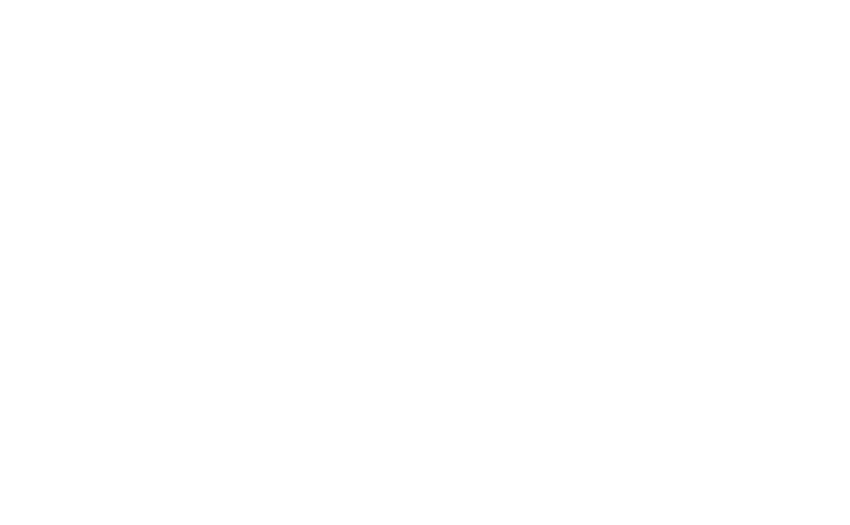

<IPython.core.display.Javascript object>


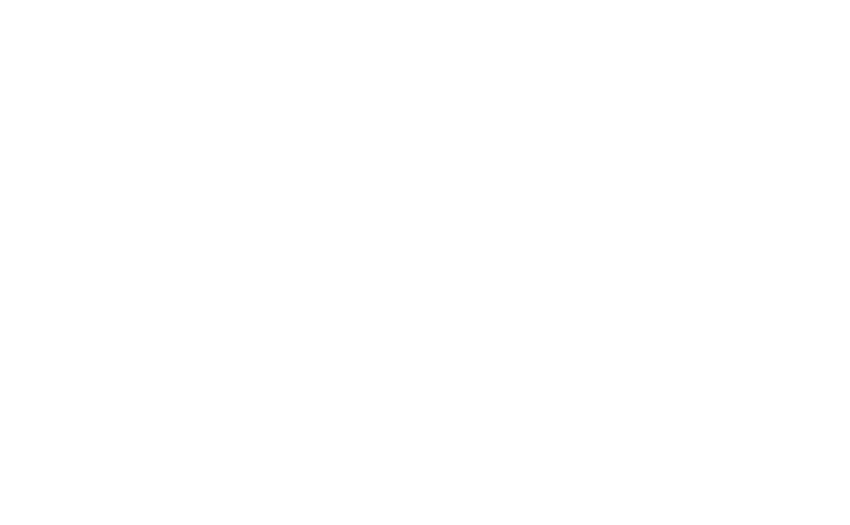

<IPython.core.display.Javascript object>


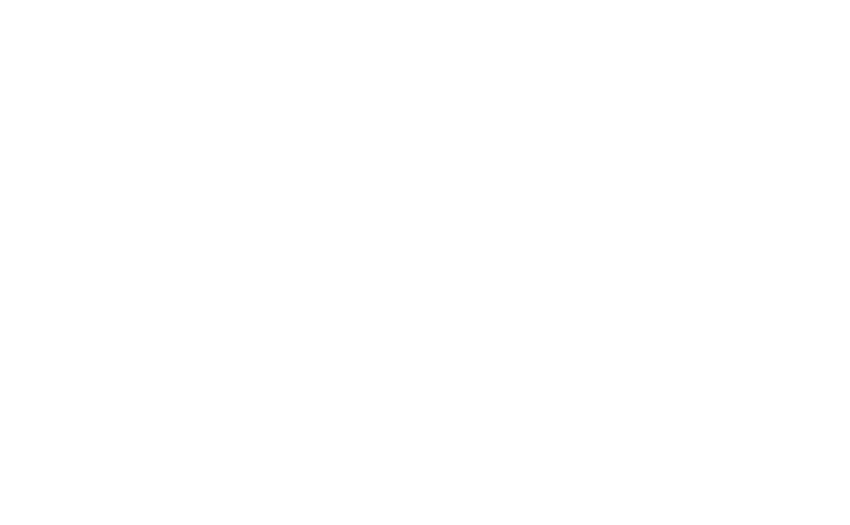

In [3]:
import matplotlib.pyplot as plt
plt.figure()
plt.contourf(grid[0],grid[1],np.abs(s))
plt.colorbar()
plt.figure()
re = np.real(np.exp(grid[0]+1j*grid[1]))
#re[grid[1]<0]*=-1
im = np.imag(np.exp(grid[0]+1j*grid[1]))
#im[grid[1]<0]*=-1
plt.contourf(re,im,np.abs(s))
plt.colorbar()
plt.figure()
plt.contourf(grid[0],grid[1],re)
plt.colorbar()

<IPython.core.display.Javascript object>


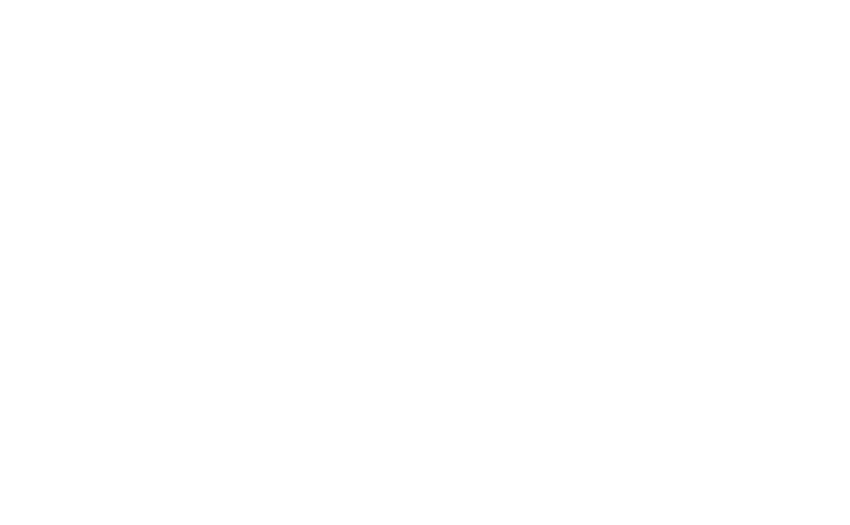

<IPython.core.display.Javascript object>


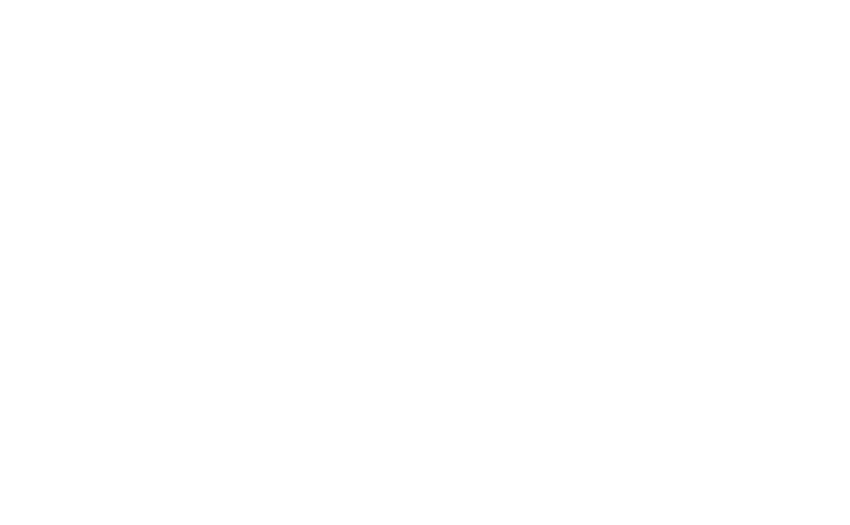

In [4]:
k=np.arange(-5,5)
x=-0.5**k
x[k>0]=2*(0.25**k[k>0])
plt.figure()
plt.plot(k,x,ls='none',marker='x')
z=grid[0]+1j*grid[1]
fun=1/(1+2*z)+2*z/(z-1/4)
#fun=z/(z+1)
#fun=z/(z-1)**2
#alpha=np.pi/2
#fun=z*np.sin(alpha)/(z**2-2*z*np.cos(alpha)+1)
#fun=2*z**3+z**2+4*z**1+z**0
plt.figure()
plt.contourf(grid[0],grid[1],np.abs(fun), cmap='binary')
#plt.imshow(np.abs(z/(z-1)))
circ=plt.Circle((0,0),1, fill=False)
ax = plt.gca()
ax.add_patch(circ)
ax.set_aspect('equal')
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)


Continuous system coefficients: 
	[5132171.74019892],
	[1.00000000e+00 4.65263888e+01 7.48235243e+03 2.07241190e+05
 7.24938527e+06]
Continuous system gain-poles-zeros: 
	5132171.740198916,
	[ -6.81363189+75.71875465j  -6.81363189-75.71875465j
 -16.44956251+31.3637351j  -16.44956251-31.3637351j ], 
	[]
Sampling frequency 31.830988618379067, 
 angular 200.0, 
 period 0.031415926535897934
Discrete system gain-poles-zeros: 
	0.064802150866907,
	[-0.16139114+0.9009985j  -0.16139114-0.9009985j   0.37810704+0.53953006j
  0.37810704-0.53953006j], 
	[-1.00032826+0.00032834j -1.00032826-0.00032834j -0.99967174+0.00032817j
 -0.99967174-0.00032817j]
Discrete system coefficients: 
	[ 1.         -0.43343178  1.02781051 -0.49348437  0.36367318],
	[0.06480215 0.2592086  0.38881291 0.2592086  0.06480215]


/vegas/apps/compiler/intel/intelpython3.7/lib/python3.7/site-packages/scipy/signal/filter_design.py:1622: BadCoefficients: Badly conditioned filter coefficients (numerator): the results may be meaningless
  "results may be meaningless", BadCoefficients)


<IPython.core.display.Javascript object>


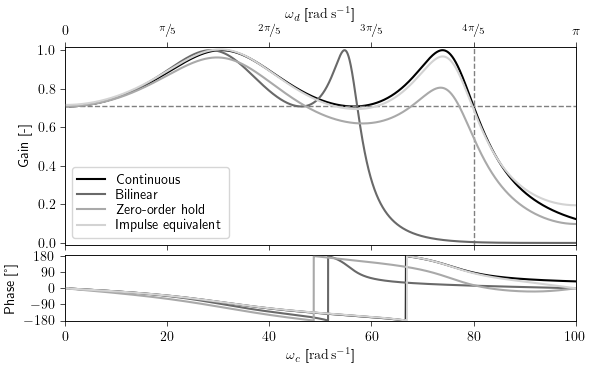

<IPython.core.display.Javascript object>


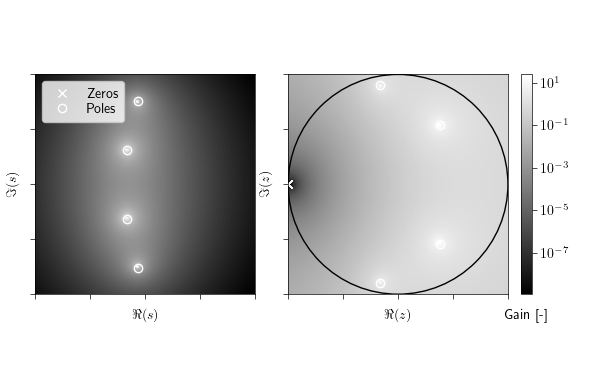

False
True
True
True
False
True


In [5]:
%matplotlib notebook
#%matplotlib inline
'''
notbook on filters (design, application) 
[analytical,
numerical verifications and 
example data (sinusoids burried in noise)]
impulse responses and frequency responses of different filters'''


import scipy.signal as signal
import matplotlib
from matplotlib import ticker, cm
import numpy as np

hp,lp=20,80

#b, a = signal.cheby1(4, 3, [hp,lp], 'bp', analog=True)
b, a = signal.cheby1(4, 3, lp, 'lp', analog=True)
csystem = signal.lti(b,a)
print(f'Continuous system coefficients: \n\t{b},\n\t{a}')
csystem = csystem.to_zpk()
print(f'Continuous system gain-poles-zeros: \n\t{csystem.gain},\n\t{csystem.poles}, \n\t{csystem.zeros}')

fs = 200/2/np.pi
print(f'Sampling frequency {fs}, \n angular {fs*2*np.pi}, \n period {1/fs}')

#discretization is applied to the state-space format of the system and transformed back to zpk format
dsystem = csystem.to_discrete(1/fs,'bilinear')
dsystem2 = csystem.to_discrete(1/fs,'zoh')
dsystem3 = csystem.to_discrete(1/fs,'impulse')

dsystem=dsystem
print(f'Discrete system gain-poles-zeros: \n\t{dsystem.gain},\n\t{dsystem.poles}, \n\t{dsystem.zeros}')
print(f'Discrete system coefficients: \n\t{dsystem.to_tf().den},\n\t{dsystem.to_tf().num}')
with matplotlib.rc_context(rc=print_context_dict):
    fig1,axes1=plt.subplots(2,1,gridspec_kw={'height_ratios':[3,1]}, sharex='col', sharey='row')
    #daxes = axes1[:,1]
    #axes1 = axes1[:,0]
    daxes = [axes1[0].twiny(),axes1[1].twiny()]
    fig2,axes2=plt.subplots(1,2)
    for system, subplots, ls, c, label in zip((csystem, dsystem, dsystem2,dsystem3),
                                      (axes1,daxes,daxes,daxes),
                                      ('solid','solid', 'solid','solid'),
                                      ('black','dimgrey','darkgrey','lightgrey'),
                                      ('Continuous','Bilinear','Zero-order hold','Impulse equivalent') ):
        
        discrete = system in (dsystem,dsystem2,dsystem3)
        print(discrete)
        
        ws, hs = system.freqresp()#signal.freqs(b, a)
        zeros,poles,k = system.zeros, system.poles, system.gain#signal.tf2zpk(b,a)

        ax1, ax2 = subplots
        #ax1.plot(ws, 20 * np.log10(abs(hs)), color='black')
        h=ax1.plot(ws, abs(hs), color=c, ls=ls,label=label)
        ax2.plot(ws,np.angle(hs)/np.pi*180, color=c, ls=ls)    


#         if discrete:
#             ax1.axvline(lp/fs, color='grey', ls='dashed') # cutoff frequency
#             #ax1.axvline(hp/fs, color='grey', ls='dashed') # cutoff frequency
#             #ax1.axhline(-3, color='grey', ls='dashed') # rp
#             ax1.axhline(10**(-3/20), color='grey', ls='dashed') # rp
#             ax1.set_xlim((0.001,1e2/fs))
        if not discrete:
            ax1.axvline(lp, color='grey', ls='dashed',lw=1) # cutoff frequency
            #ax1.axvline(hp, color='grey', ls='dashed') # cutoff frequency
            ax1.axhline(10**(-3/20), color='grey', ls='dashed',lw=1) # rp
            ax1.set_xlim((0.001,1e2))
    handles,labels=axes1[0].get_legend_handles_labels()
    handles1,labels1=daxes[0].get_legend_handles_labels()
    handles += handles1
    labels += labels1
    axes1[0].legend(handles,labels)
    
    daxes[0].set_xlabel('$\omega_d$ [\\si{\\radian\\per\\second}]')
    axes1[-1].set_xlabel('$\omega_c$ [\\si{\\radian\\per\\second}]')
    axes1[1].yaxis.set_major_locator(ticker.MultipleLocator(90))
    #axes1[1,0].yaxis.set_minor_locator(ticker.MultipleLocator(45))
    axes1[0].set_ylabel('Gain [-]')
    axes1[1].set_ylabel('Phase [\\si{\\degree}]')
    daxes[1].set_xticks([])
    
    
    daxes[0].xaxis.set_major_locator(plt.MultipleLocator(np.pi/5))
    daxes[0].xaxis.set_major_formatter(plt.FuncFormatter(multiple_formatter(5)))
    fig1.subplots_adjust(top=0.87,bottom=0.12,left=0.11, right=0.975,wspace=0.045, hspace=0.08)
    axes1[0].set_xlim((0,fs*np.pi))
    daxes[0].set_xlim((0,np.pi))
    axes1[1].set_xlim((0,fs*np.pi))
    daxes[1].set_xlim((0,np.pi))
    #fig1.savefig('/ismhome/staff/womo1998/Projects/2019_OMA_UQ/tex/figures/math_basics/contdiscr_freq_resp.pdf')
    #fig1.savefig('/ismhome/staff/womo1998/Projects/2019_OMA_UQ/tex/figures/math_basics/contdiscr_freq_resp.png')
    
    
    for system, ax3 in zip((csystem, dsystem),(axes2[0],axes2[1])):
        discrete = system in (dsystem,dsystem2,dsystem3)
        print(discrete)
        
        ws, hs = system.freqresp()#signal.freqs(b, a)
        zeros,poles,k = system.zeros, system.poles, system.gain#signal.tf2zpk(b,a)
        
        if discrete:
            x,y=np.linspace(-1.1,1.1,100),np.linspace(-1.1,1.1,100)
        else:
            x,y=np.linspace(-100,100,100),np.linspace(-100,100,100)
        grid=np.meshgrid(x,y)
        zgrid=grid[0]+1j*grid[1]
        H=np.zeros_like(zgrid)
        for i in range(zgrid.shape[0]):
            for j in range(zgrid.shape[1]):
                z= zgrid[i,j]
                H[i,j]=k*np.product(z-zeros)/np.product(z-poles)
        #plt.contourf(grid[0],grid[1],np.abs(H),levels=30,locator=ticker.LogLocator(),cmap='gray')

        im=ax3.imshow(np.abs(H),extent=[x[0],x[-1],y[0],y[-1]], cmap='gray', norm=matplotlib.colors.LogNorm())



        #plt.figure()
        ax3.plot(np.real(zeros), np.imag(zeros), 'xw')
        ax3.plot(np.real(poles), np.imag(poles), 'ow', fillstyle='none')

        if discrete:
            circ=plt.Circle((0,0),1, fill=False)
            ax3.add_patch(circ)
            ax3.set_aspect('equal')
            ax3.set_xlim((-1,1))
            ax3.set_ylim((-1,1))
        else:
            ax3.set_xlim((-100,100))
            ax3.set_ylim((-100,100))
        
        if discrete:
            ax3.set_xlabel('$\Re(z)$')
            ax3.set_ylabel('$\Im(z)$')
        else:
            ax3.set_xlabel('$\Re(s)$')
            ax3.set_ylabel('$\Im(s)$')
        ax3.set_yticklabels([])
        ax3.set_xticklabels([])
    axes2[0].legend(['Zeros', 'Poles'], loc=2)      
    cbar=fig2.colorbar(im, ax=axes2.ravel().tolist(), fraction=0.024, pad=0.04)
    cbar.ax.set_xlabel('Gain [-]',labelpad=11)
    #fig2.savefig('/ismhome/staff/womo1998/Projects/2019_OMA_UQ/tex/figures/math_basics/cont_discr_zpk.pdf')
    #fig2.savefig('/ismhome/staff/womo1998/Projects/2019_OMA_UQ/tex/figures/math_basics/cont_discr_zpk.png')

    fig2.subplots_adjust(top=0.92,bottom=0.07,left=0.06, right=0.86,wspace=0.15)

    plt.show()

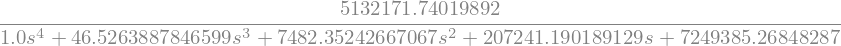

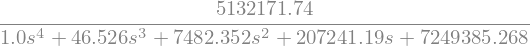

In [7]:
z,s=symbols('z s')
f=Poly(b,s)/Poly(a,s)
display(f)
display(printM(f,3))

In [8]:
poles=solve(fraction(f)[1],s)
zeros=solve(fraction(f)[0],s)
coeff_one=Poly(fraction(f)[1]).coeffs()[0]
gain=Poly(fraction(f)[0]/coeff_one,s).coeffs()[-1]
display([printM(pol,3) for pol in poles], [printM(zero,3) for zero in zeros], printM(gain,3))

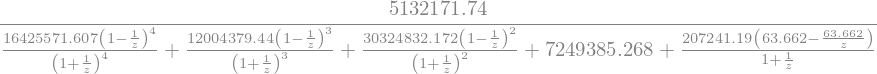

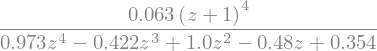

In [9]:
T=1/fs
fz=f.subs(s,2/T*(1-z**-1)/(1+z**-1))
display(printM(fz,3))
fz=factor(fz)
display(printM(fz,3))

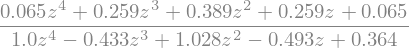

In [10]:
coeff_one=Poly(fraction(fz)[1]).coeffs()[0]
display(printM(cancel(fraction(fz)[0]/coeff_one)/(fraction(fz)[1]/coeff_one),3))

In [11]:
display('zeros', [printM(z,3) for z in solve(fraction(fz)[0],z)])
display('poles',[printM(p,3) for p in solve(fraction(fz)[1],z)])
display('gain',printM(Poly(fraction(fz)[0]/coeff_one,z).coeffs()[-1],3))

'zeros'

'poles'

'gain'